In [99]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from random import seed
import time
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten, MaxPooling2D, Activation,Dropout,MaxPool2D
from tensorflow.keras.models import Model
import tensorflow as tf
import seaborn as sns
%matplotlib inline

In [3]:
start_time = time.time()
df=pd.read_csv("All_Merged_Structured_Data_list.csv")
df.columns

Index(['GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle',
       'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
       'VaccinationName', 'MeasurementName', 'NoteText'],
      dtype='object')

In [50]:
# df.head()

In [ ]:
# Allergy
# Diagnosis
# Procedure Name
# Measurement Name
# Vaccination Name
# Only Structured Data

### NA
# Visit Information + Structure Data
# F number + Structure Data
# DS number + Structure Data
# F number + DS number + Structure Data
# Visit Information + F number + DS number + Structure Data


In [71]:
df2 = df[['DiagnosisName','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=df2['DiagnosisName'].tolist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 0 to 3101
Data columns (total 2 columns):
DiagnosisName    3098 non-null object
target           3098 non-null int64
dtypes: int64(1), object(1)
memory usage: 72.6+ KB


In [4]:
df2 = df[['ProblemList','Allergen','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=(df2['ProblemList']+df2['Allergen']).tolist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 3101
Data columns (total 3 columns):
ProblemList    2294 non-null object
Allergen       2294 non-null object
target         2294 non-null int64
dtypes: int64(1), object(2)
memory usage: 71.7+ KB


(5380, 400)
(3098, 400)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 400, 2)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 34        
Total params: 222,578
Trainable params: 222,578
Non-trainable params: 0
_____________________________

Epoch 69/100
2478/2478 - 2s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.6075 - val_accuracy: 0.8145
Epoch 70/100
2478/2478 - 1s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.6373 - val_accuracy: 0.8177
Epoch 71/100
2478/2478 - 1s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.6131 - val_accuracy: 0.8242
Epoch 72/100
2478/2478 - 1s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.6335 - val_accuracy: 0.8161
Epoch 73/100
2478/2478 - 1s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.5934 - val_accuracy: 0.8210
Epoch 74/100
2478/2478 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.6209 - val_accuracy: 0.8145
Epoch 75/100
2478/2478 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.6125 - val_accuracy: 0.8177
Epoch 76/100
2478/2478 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.6105 - val_accuracy: 0.8161
Epoch 77/100
2478/2478 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.6330 - val_accuracy: 0.8194
Epoch 78/100
2478/2478 - 1s - loss: 0.0105 - accuracy: 1.0000 - 

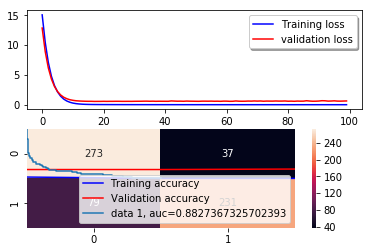

In [102]:
label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
vectorizer = TfidfVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

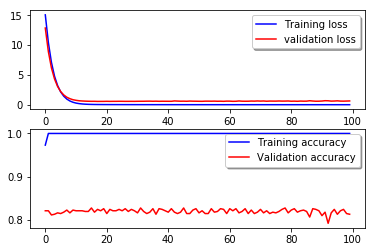

In [103]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

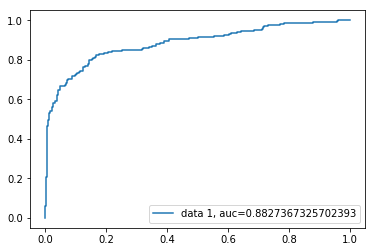

In [104]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Allergen

In [106]:
df2 = df[['Allergen','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=df2['Allergen'].tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
vectorizer = TfidfVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 3101
Data columns (total 2 columns):
Allergen    2294 non-null object
target      2294 non-null int64
dtypes: int64(1), object(1)
memory usage: 53.8+ KB
(1167, 400)
(2294, 400)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 400, 2)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_26 (Dense)             (None, 16)                1040      
___________

Epoch 66/100
1835/1835 - 0s - loss: 0.2522 - accuracy: 0.8905 - val_loss: 1.2366 - val_accuracy: 0.4924
Epoch 67/100
1835/1835 - 0s - loss: 0.2392 - accuracy: 0.9014 - val_loss: 1.1344 - val_accuracy: 0.4902
Epoch 68/100
1835/1835 - 0s - loss: 0.2352 - accuracy: 0.8997 - val_loss: 1.1770 - val_accuracy: 0.4902
Epoch 69/100
1835/1835 - 0s - loss: 0.2376 - accuracy: 0.9003 - val_loss: 1.1500 - val_accuracy: 0.4989
Epoch 70/100
1835/1835 - 0s - loss: 0.2487 - accuracy: 0.9008 - val_loss: 1.1598 - val_accuracy: 0.4902
Epoch 71/100
1835/1835 - 0s - loss: 0.2343 - accuracy: 0.9041 - val_loss: 1.1744 - val_accuracy: 0.4946
Epoch 72/100
1835/1835 - 0s - loss: 0.2436 - accuracy: 0.9052 - val_loss: 1.2035 - val_accuracy: 0.4902
Epoch 73/100
1835/1835 - 0s - loss: 0.2383 - accuracy: 0.9008 - val_loss: 1.1918 - val_accuracy: 0.5120
Epoch 74/100
1835/1835 - 0s - loss: 0.2416 - accuracy: 0.9014 - val_loss: 1.1940 - val_accuracy: 0.4837
Epoch 75/100
1835/1835 - 0s - loss: 0.2421 - accuracy: 0.8997 - 

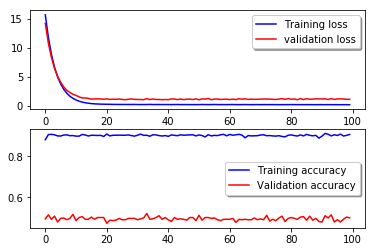

In [107]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

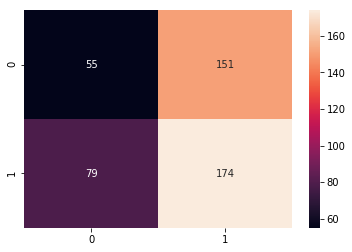

In [108]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

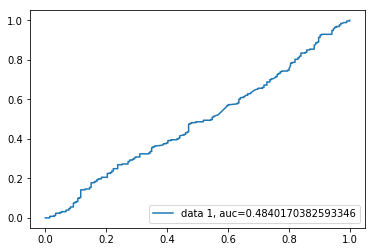

In [109]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## DiagnosisName

In [110]:
df2 = df[['DiagnosisName','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=df2['DiagnosisName'].tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
vectorizer = TfidfVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 0 to 3101
Data columns (total 2 columns):
DiagnosisName    3098 non-null object
target           3098 non-null int64
dtypes: int64(1), object(1)
memory usage: 72.6+ KB
(5380, 400)
(3098, 400)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 400, 2)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_30 (Dense)             (None, 16)                1040      
_

Epoch 66/100
2478/2478 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.5967 - val_accuracy: 0.8258
Epoch 67/100
2478/2478 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.6027 - val_accuracy: 0.8226
Epoch 68/100
2478/2478 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.6001 - val_accuracy: 0.8210
Epoch 69/100
2478/2478 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.6026 - val_accuracy: 0.8242
Epoch 70/100
2478/2478 - 0s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.6038 - val_accuracy: 0.8258
Epoch 71/100
2478/2478 - 0s - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.5845 - val_accuracy: 0.8258
Epoch 72/100
2478/2478 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.5928 - val_accuracy: 0.8194
Epoch 73/100
2478/2478 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.5932 - val_accuracy: 0.8258
Epoch 74/100
2478/2478 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.5919 - val_accuracy: 0.8242
Epoch 75/100
2478/2478 - 0s - loss: 0.0122 - accuracy: 1.0000 - 

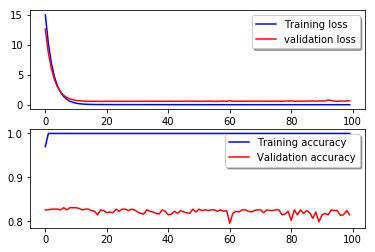

In [111]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

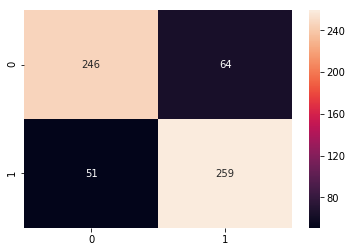

In [112]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

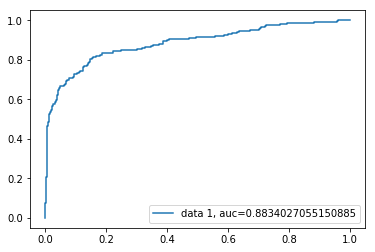

In [113]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ProcedureName

In [136]:
df2 = df[['ProcedureName','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=df2['ProcedureName'].tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
# vectorizer = TfidfVectorizer()
# expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 0 to 3101
Data columns (total 2 columns):
ProcedureName    3102 non-null object
target           3102 non-null int64
dtypes: int64(1), object(1)
memory usage: 72.7+ KB
(1706, 400)
(3102, 400)
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 400, 2)]          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_53 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_54 (Dense)             (None, 16)                1040      


Epoch 66/100
2482/2482 - 0s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.9652 - val_accuracy: 0.7661
Epoch 67/100
2482/2482 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.9575 - val_accuracy: 0.7790
Epoch 68/100
2482/2482 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.9942 - val_accuracy: 0.7629
Epoch 69/100
2482/2482 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.9506 - val_accuracy: 0.7790
Epoch 70/100
2482/2482 - 0s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.9214 - val_accuracy: 0.7726
Epoch 71/100
2482/2482 - 0s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.9352 - val_accuracy: 0.7790
Epoch 72/100
2482/2482 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.8731 - val_accuracy: 0.7694
Epoch 73/100
2482/2482 - 0s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.9405 - val_accuracy: 0.7806
Epoch 74/100
2482/2482 - 0s - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.9550 - val_accuracy: 0.7806
Epoch 75/100
2482/2482 - 0s - loss: 0.0122 - accuracy: 1.0000 - 

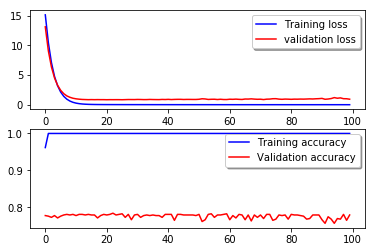

In [137]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

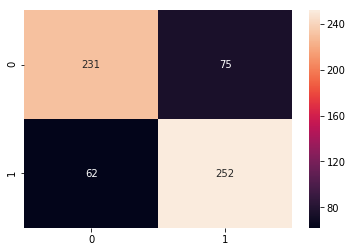

In [138]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

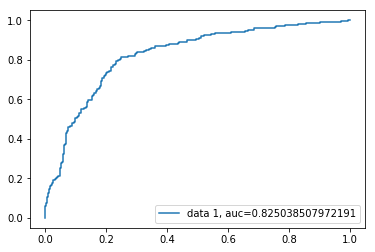

In [139]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## VaccinationName

In [119]:
df2 = df[['VaccinationName','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=df2['VaccinationName'].tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
vectorizer = TfidfVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3101
Data columns (total 2 columns):
VaccinationName    3006 non-null object
target             3006 non-null int64
dtypes: int64(1), object(1)
memory usage: 70.5+ KB
(235, 400)
(3006, 400)
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 400, 2)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_37 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_38 (Dense)             (None, 16)                1040     

Epoch 66/100
2405/2405 - 0s - loss: 0.3196 - accuracy: 0.8836 - val_loss: 0.8699 - val_accuracy: 0.6539
Epoch 67/100
2405/2405 - 0s - loss: 0.3189 - accuracy: 0.8832 - val_loss: 0.8696 - val_accuracy: 0.6473
Epoch 68/100
2405/2405 - 0s - loss: 0.3119 - accuracy: 0.8857 - val_loss: 0.8671 - val_accuracy: 0.6373
Epoch 69/100
2405/2405 - 0s - loss: 0.3067 - accuracy: 0.8890 - val_loss: 0.8474 - val_accuracy: 0.6572
Epoch 70/100
2405/2405 - 0s - loss: 0.3053 - accuracy: 0.8861 - val_loss: 0.8575 - val_accuracy: 0.6389
Epoch 71/100
2405/2405 - 0s - loss: 0.3045 - accuracy: 0.8865 - val_loss: 0.8355 - val_accuracy: 0.6373
Epoch 72/100
2405/2405 - 0s - loss: 0.2991 - accuracy: 0.8894 - val_loss: 0.8559 - val_accuracy: 0.6589
Epoch 73/100
2405/2405 - 0s - loss: 0.2989 - accuracy: 0.8869 - val_loss: 0.8803 - val_accuracy: 0.6356
Epoch 74/100
2405/2405 - 0s - loss: 0.3130 - accuracy: 0.8877 - val_loss: 0.8310 - val_accuracy: 0.6323
Epoch 75/100
2405/2405 - 0s - loss: 0.2983 - accuracy: 0.8873 - 

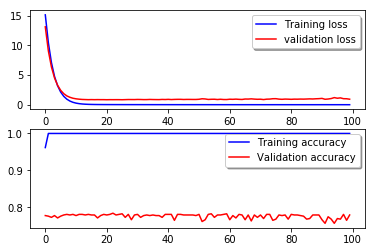

In [140]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

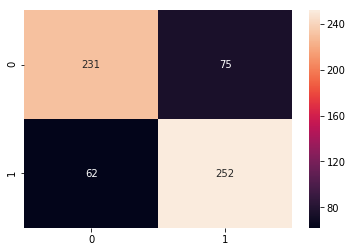

In [141]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

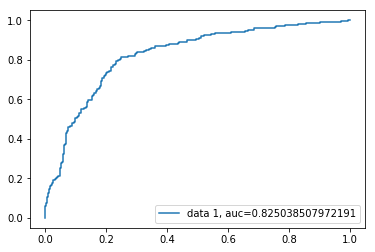

In [142]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## MeasurementName

In [143]:
df2 = df[['MeasurementName','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=df2['MeasurementName'].tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
# vectorizer = TfidfVectorizer()
# expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 3101
Data columns (total 2 columns):
MeasurementName    2942 non-null object
target             2942 non-null int64
dtypes: int64(1), object(1)
memory usage: 69.0+ KB
(1664, 400)
(2942, 400)
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 400, 2)]          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_57 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_58 (Dense)             (None, 16)                1040   

Epoch 66/100
2354/2354 - 0s - loss: 0.0174 - accuracy: 0.9996 - val_loss: 0.8724 - val_accuracy: 0.7551
Epoch 67/100
2354/2354 - 0s - loss: 0.0161 - accuracy: 0.9996 - val_loss: 0.6670 - val_accuracy: 0.7976
Epoch 68/100
2354/2354 - 0s - loss: 0.0168 - accuracy: 0.9996 - val_loss: 0.6816 - val_accuracy: 0.7976
Epoch 69/100
2354/2354 - 0s - loss: 0.0157 - accuracy: 0.9996 - val_loss: 0.6552 - val_accuracy: 0.7925
Epoch 70/100
2354/2354 - 0s - loss: 0.0161 - accuracy: 0.9992 - val_loss: 0.7170 - val_accuracy: 0.7959
Epoch 71/100
2354/2354 - 0s - loss: 0.0157 - accuracy: 0.9996 - val_loss: 0.6919 - val_accuracy: 0.7925
Epoch 72/100
2354/2354 - 0s - loss: 0.0152 - accuracy: 0.9996 - val_loss: 0.6605 - val_accuracy: 0.7925
Epoch 73/100
2354/2354 - 0s - loss: 0.0158 - accuracy: 0.9992 - val_loss: 0.7259 - val_accuracy: 0.7891
Epoch 74/100
2354/2354 - 0s - loss: 0.0154 - accuracy: 0.9992 - val_loss: 0.7797 - val_accuracy: 0.7738
Epoch 75/100
2354/2354 - 0s - loss: 0.0156 - accuracy: 0.9996 - 

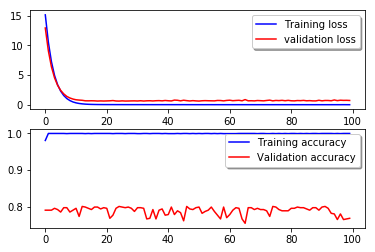

In [146]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

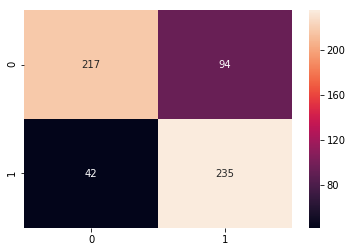

In [147]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

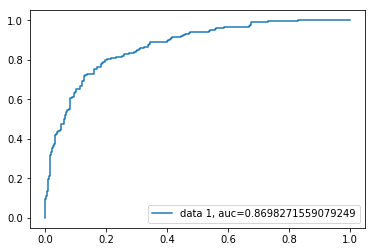

In [148]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName'

In [149]:
df2 = df[['Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName','target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=(df2['DiagnosisName']+df2['Allergen']+df2['ProcedureName']+df2['VaccinationName']+df2['MeasurementName']).tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
# vectorizer = TfidfVectorizer()
# expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 3101
Data columns (total 6 columns):
Allergen           2110 non-null object
DiagnosisName      2110 non-null object
ProcedureName      2110 non-null object
VaccinationName    2110 non-null object
MeasurementName    2110 non-null object
target             2110 non-null int64
dtypes: int64(1), object(5)
memory usage: 115.4+ KB
(11668, 400)
(2110, 400)
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 400, 2)]          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_61 (Dense)             (No

Epoch 65/100
1688/1688 - 0s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.2539 - val_accuracy: 0.9242
Epoch 66/100
1688/1688 - 0s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.2526 - val_accuracy: 0.9171
Epoch 67/100
1688/1688 - 0s - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.2554 - val_accuracy: 0.9242
Epoch 68/100
1688/1688 - 0s - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2443 - val_accuracy: 0.9171
Epoch 69/100
1688/1688 - 0s - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.2517 - val_accuracy: 0.9218
Epoch 70/100
1688/1688 - 0s - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9147
Epoch 71/100
1688/1688 - 0s - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.9242
Epoch 72/100
1688/1688 - 0s - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.2518 - val_accuracy: 0.9242
Epoch 73/100
1688/1688 - 0s - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.2576 - val_accuracy: 0.9171
Epoch 74/100
1688/1688 - 0s - loss: 0.0139 - accuracy: 1.0000 - 

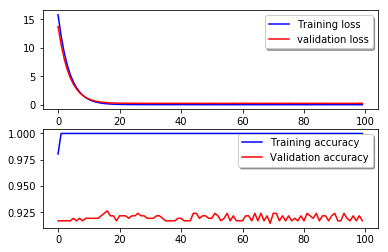

In [152]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

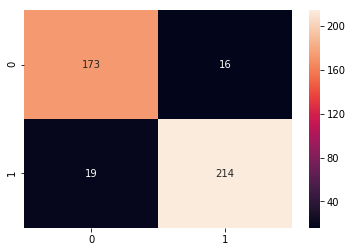

In [153]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

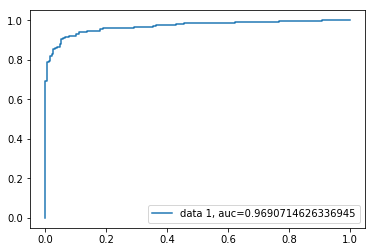

In [154]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Rifat 

In [155]:
df2 = df[['Allergen', 'ProblemList', 'target']]
# 'Allergen', 'DiagnosisName', 'ProcedureName', 'VaccinationName', 'MeasurementName',

# 'GBPatientID', 'sentiment', 'ProblemList', 'diseaseTitle', 
# 'findingTitle', 'target', 'Allergen', 'DiagnosisName', 'ProcedureName',
# 'VaccinationName', 'MeasurementName', 'NoteText'

df2=df2.dropna()

df2.info()

label=df2['target'].tolist()

Counter(df2['target'])

corpus=(df2['ProblemList']+df2['Allergen']).tolist()


label_vec = np.array(label)
vectorizer = CountVectorizer()
expression = vectorizer.fit_transform(corpus).toarray()
# vectorizer = TfidfVectorizer()
# expression = vectorizer.fit_transform(corpus).toarray()

expression, label_vec = shuffle(expression, label_vec) 

cutpoint = round((len(expression)/100)*80)
# expression, label_vec = shuffle(expression, label_vec) 
expression_train = expression[:cutpoint, :]
expression_test = expression[cutpoint:, :]
y_train = label_vec[:cutpoint]
y_test = label_vec[cutpoint:]

## RF part
n_trees = 400
rf = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1)
rf.fit(expression_train, y_train)
acc_rf = 1 - sum(abs(rf.predict(expression_test)-y_test))/len(y_test)

imp_mat = np.zeros([np.shape(expression_train)[1], n_trees])
for i in range(n_trees):
    imp_mat[:,i] = rf.estimators_[i].feature_importances_
print(np.shape(imp_mat))

x_total = [tree.predict(expression) for tree in rf.estimators_]
x_total = np.transpose(x_total)
print(np.shape(x_total))

## one-hot encode the binary inputs from forests
x_train = []
for sample in x_total:
    s = []
    for feature in sample:
        if feature == 1:
            s.append([0, 1])
        else:
            s.append([1, 0])
    x_train.append(s)
x_train = np.array(x_train)
x_test = x_train[cutpoint:, :] ## order is fixed from the forest, do not shuffle
x_train = x_train[:cutpoint, :]


## one-hot encode the labels
labels = []
for l in label_vec:
    if l == 1:
        labels.append([0, 1])
    else:
        labels.append([1, 0])
labels = np.array(labels,dtype=int)

y_train = labels[:cutpoint, :]
y_test = labels[cutpoint:, :]
auc_rf = metrics.roc_auc_score(y_test, rf.predict_proba(expression_test))


initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=.1)
np.random.seed(3)


inputs = Input(shape=(x_train.shape[1],2,))

model = Flatten()(inputs)
model= Dense(256,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
model= Dense(64,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
model= Dense(16,kernel_initializer=initializer,kernel_regularizer='l2',activation=tf.nn.relu)(model)
#model= Dropout(rate=0.5)(model)
outputs = Dense(2,kernel_initializer=initializer, activation=tf.nn.softmax)(model)

model = Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128, verbose=2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 3101
Data columns (total 3 columns):
Allergen       2294 non-null object
ProblemList    2294 non-null object
target         2294 non-null int64
dtypes: int64(1), object(2)
memory usage: 71.7+ KB
(7883, 400)
(2294, 400)
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 400, 2)]          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_65 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_66 (Dense)             (None

Epoch 66/100
1835/1835 - 0s - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.2641 - val_accuracy: 0.8911
Epoch 67/100
1835/1835 - 0s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.2651 - val_accuracy: 0.8911
Epoch 68/100
1835/1835 - 0s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.2642 - val_accuracy: 0.8911
Epoch 69/100
1835/1835 - 0s - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.3178 - val_accuracy: 0.8889
Epoch 70/100
1835/1835 - 0s - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.8911
Epoch 71/100
1835/1835 - 0s - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.8911
Epoch 72/100
1835/1835 - 0s - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2666 - val_accuracy: 0.8911
Epoch 73/100
1835/1835 - 0s - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.2522 - val_accuracy: 0.8911
Epoch 74/100
1835/1835 - 0s - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.2836 - val_accuracy: 0.8932
Epoch 75/100
1835/1835 - 0s - loss: 0.0140 - accuracy: 1.0000 - 

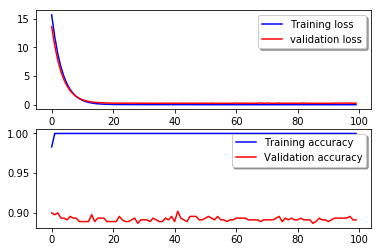

In [156]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

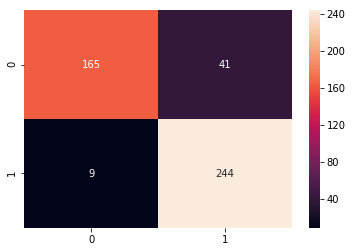

In [157]:
prob_y=model.predict(x_test)

y_pred=np.argmax(prob_y,axis=1)

cf_matrix = confusion_matrix(y_test[:,1], y_pred)

sns.heatmap(cf_matrix, annot=True,fmt='d')

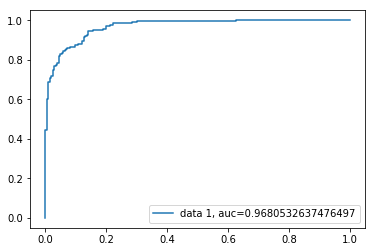

In [158]:
#drawing auc curve
prob_y=model.predict(x_test)[:,1]
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test[:,1],  prob_y)
auc = metrics.roc_auc_score(y_test[:,1],  prob_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()